In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Caminho para o arquivo local (você precisa baixar o arquivo `nursery.data` e salvar em 'data/')
file_path = 'data/nursery.data'

# Lista de colunas de acordo com a documentação da UCI
columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing',
    'finance', 'social', 'health', 'class'
]

# Carregando o DataFrame
df = pd.read_csv(file_path, header=None, names=columns)

# Visualizar as 10 primeiras linhas
display(df.head(10))


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


In [12]:
print("Número de linhas: ", len(df))

Número de linhas:  12960


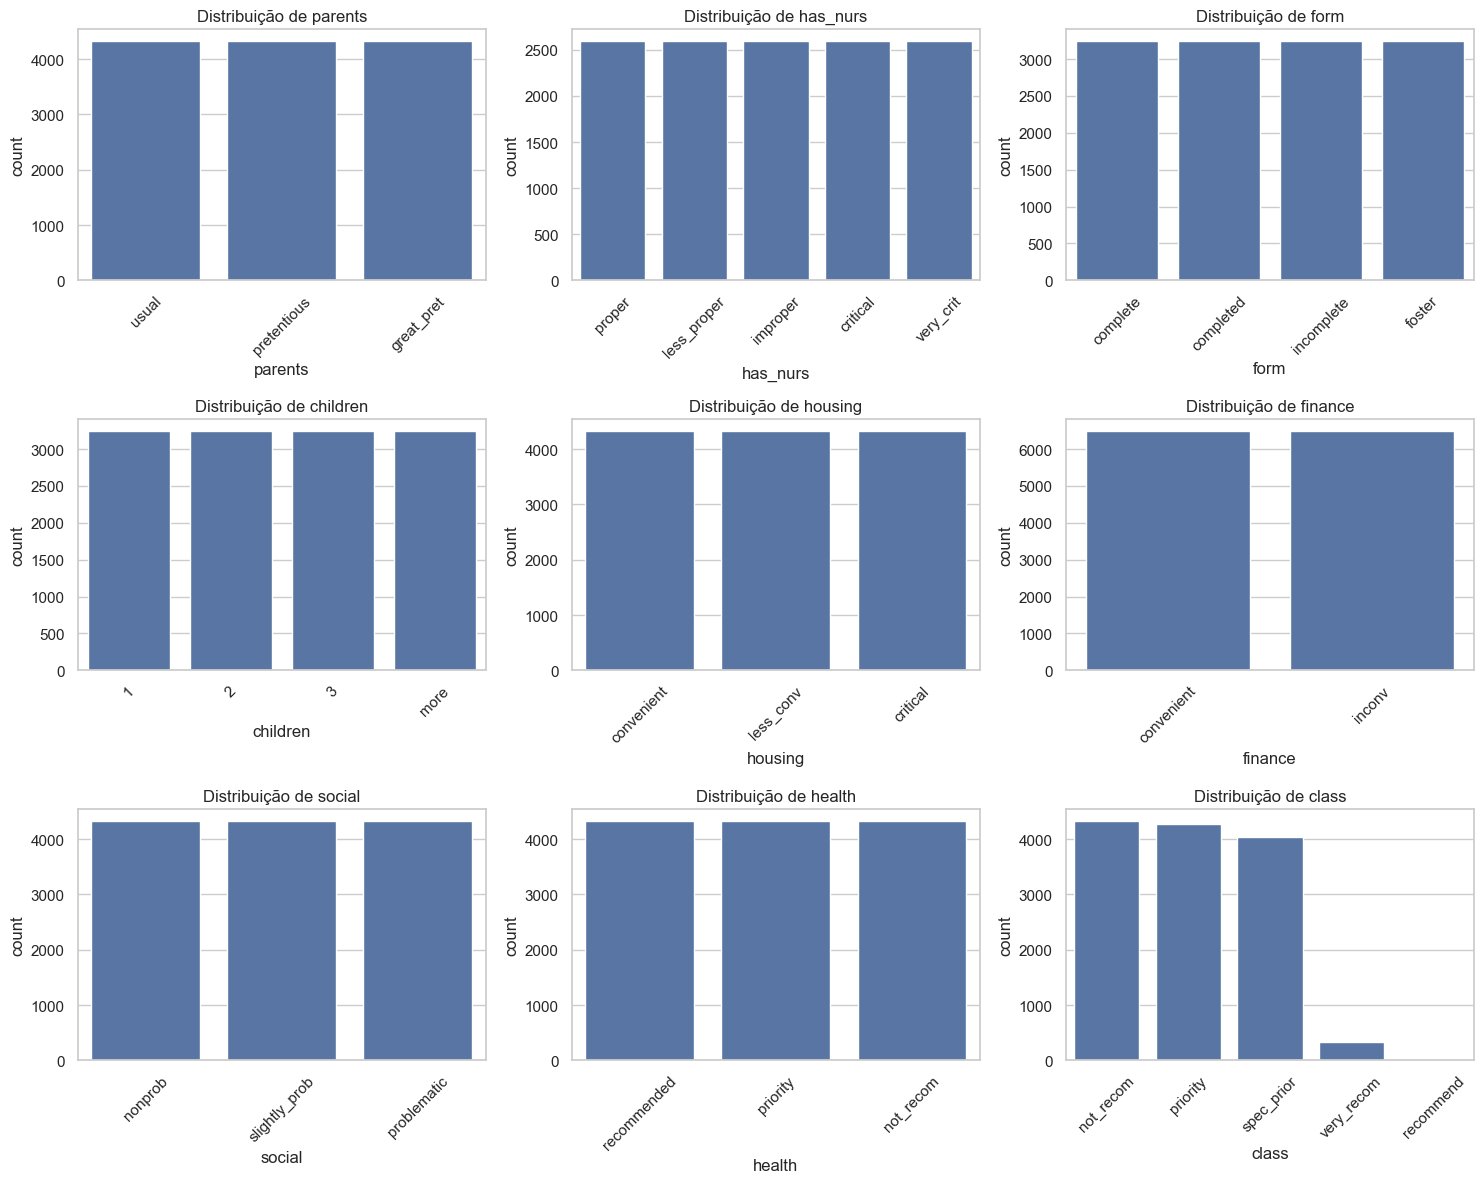

In [13]:
sns.set(style="whitegrid")

# Seleciona colunas categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Caso só tenha 1 linha e 1 coluna, 'axes' pode ser um único objeto, não array
if n_rows == 1 and n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove subplots extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [15]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

corr_matrix = corr_matrix.astype(float)


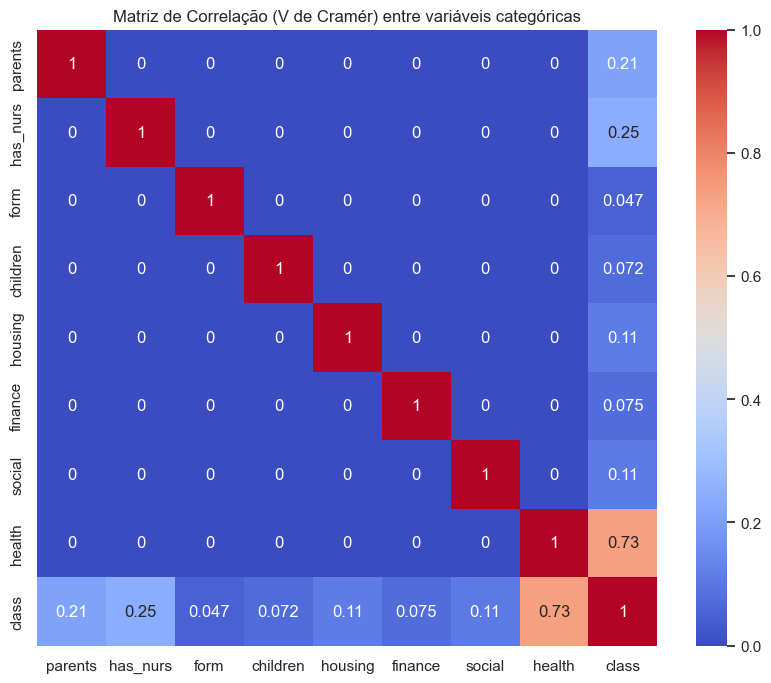

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Matriz de Correlação (V de Cramér) entre variáveis categóricas")
plt.show()


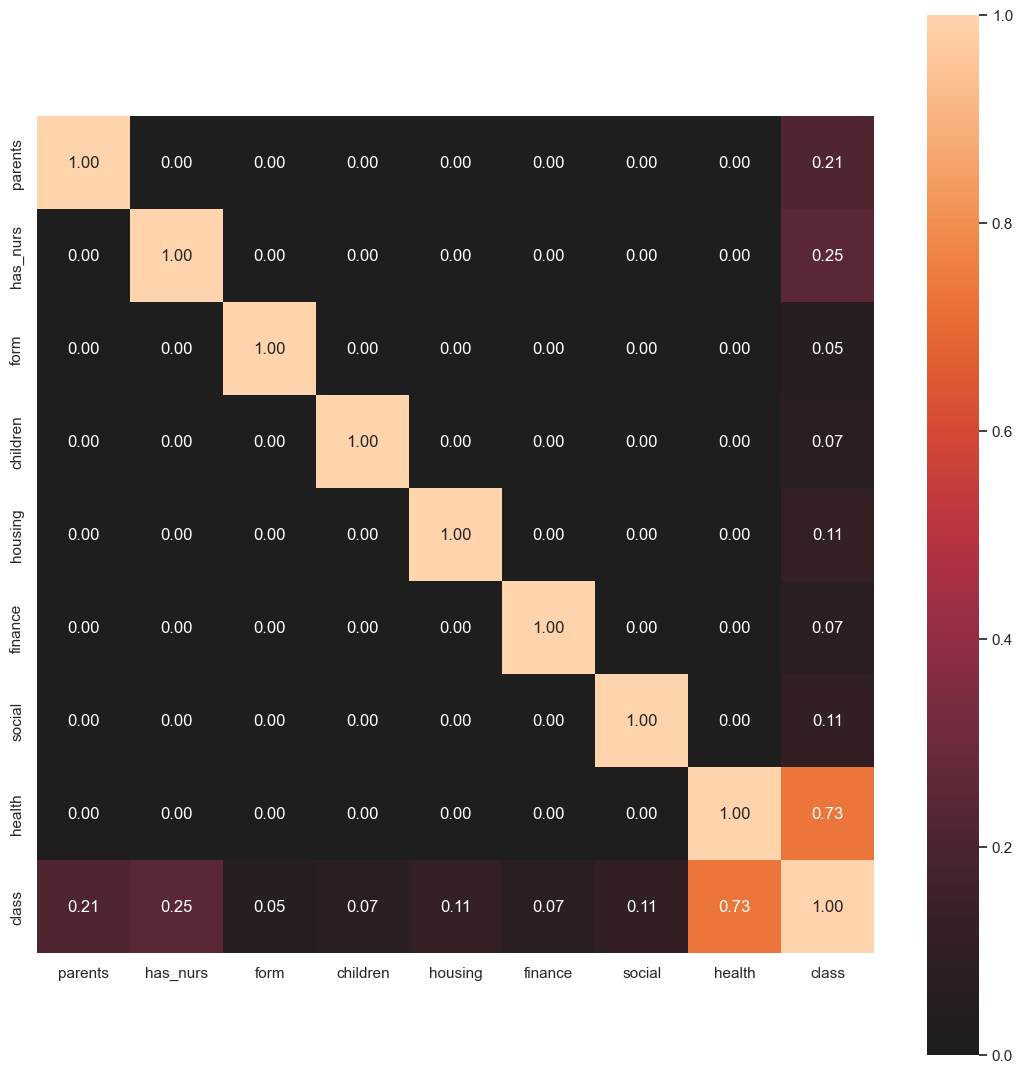

{'corr':            parents  has_nurs      form  children   housing  finance    social  \
 parents   1.000000  0.000000  0.000000   0.00000  0.000000  0.00000  0.000000   
 has_nurs  0.000000  1.000000  0.000000   0.00000  0.000000  0.00000  0.000000   
 form      0.000000  0.000000  1.000000   0.00000  0.000000  0.00000  0.000000   
 children  0.000000  0.000000  0.000000   1.00000  0.000000  0.00000  0.000000   
 housing   0.000000  0.000000  0.000000   0.00000  1.000000  0.00000  0.000000   
 finance   0.000000  0.000000  0.000000   0.00000  0.000000  1.00000  0.000000   
 social    0.000000  0.000000  0.000000   0.00000  0.000000  0.00000  1.000000   
 health    0.000000  0.000000  0.000000   0.00000  0.000000  0.00000  0.000000   
 class     0.213636  0.245821  0.046911   0.07188  0.111596  0.07473  0.105963   
 
             health     class  
 parents   0.000000  0.213636  
 has_nurs  0.000000  0.245821  
 form      0.000000  0.046911  
 children  0.000000  0.071880  
 housing  

In [18]:
from dython.nominal import associations

associations(df, plot=True)

